# Result Analysis

*too: description*

In this notebook I analyse the results produced by running the experiment.

In [25]:
import logging
import os
import os.path

import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path

from metrics.mae import MAE
from metrics.coverage_rate import CoverageRate, RollingCoverageRate, CoveredDimensions, CoverageRateByFeature, \
    RollingCoverageRateByFeature
from metrics.infinity_count import InfinityCount
from metrics.interval_width import MeanIntervalWidth, RollingMeanIntervalWidth

logging.basicConfig(level=logging.INFO, format='%(levelname)s %(filename)s:%(lineno)s %(funcName)s() %(message)s')

In [15]:
os.getcwd()

'/Users/filip.schlembach/Documents/uni/thesis_masters/code/um_thesis_methods/src/scripts/exp_07_longelec2_lin_correction'

In [2]:
experiment_name = 'exp_07_longelec2_lin_correction'

In [3]:
experiment_group_dir = Path('../../../assets/experimental_results') / experiment_name
weight_functions_and_corrections = {
    'bf_soft_cutoff': 'sol_icp_bf_soft_cutoff_c200_s50.json',
    'independent_soft_cutoff': 'sol_icp_independent_soft_cutoff_c200_s50.json',
    'no_soft_cutoff': 'sol_icp_no_soft_cutoff_c200_s50.json',
}
univariate_and_multivariate_ds = {
    'multv': 'elec2_ds_multivariate.json',
}

fig_names = ['Bonferroni', 'Independent', 'No']

experiment_dirs = []
for icp_setting, icp_params_file in weight_functions_and_corrections.items():
    for ds_setting, ds_params_file in univariate_and_multivariate_ds.items():
        experiment_dirs.append(f'{ds_setting}_{icp_setting}')

__Output Paths__

In [4]:
latex_dir = Path('/Users/filip.schlembach/Documents/uni/thesis_masters/latex/um_thesis_manuscript')
table_out_dir = latex_dir / 'tables' / experiment_name
fig_out_dir = latex_dir / 'figures' / experiment_name


def now() -> str:
    return datetime.datetime.now().strftime('%y%m%d_%H%M')

## MAE

In [5]:
mae_results = {exp_dir: MAE.load(
    os.path.join(os.path.join(experiment_group_dir, exp_dir + '/summary'), MAE.snake_name())) for exp_dir in
    experiment_dirs}

print('underlying model mae on test set:', mae_results)

underlying model mae on test set: {'multv_bf_soft_cutoff': 0.07918997248997298, 'multv_independent_soft_cutoff': 0.07724328986144517, 'multv_no_soft_cutoff': 0.07974818291054278}


Since they all perform more or less the same, I won't dive deeper into it.

## Coverage Rate

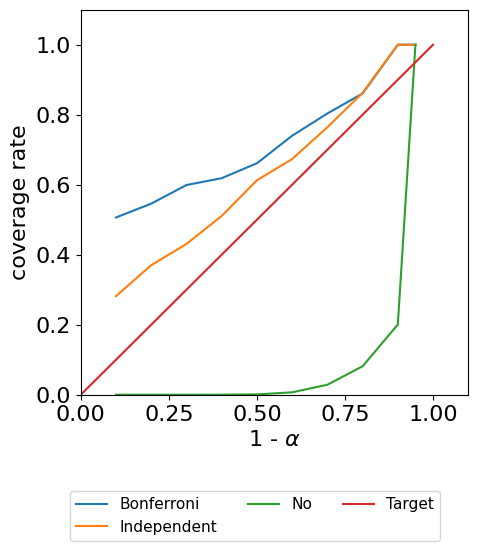

In [6]:
cr_results = [CoverageRate.load(
    os.path.join(os.path.join(experiment_group_dir, exp_dir + '/summary'), CoverageRate.snake_name())) for exp_dir in
    experiment_dirs]
plt.rcParams.update({'font.size': 16})
CoverageRate.comparative_plot(cr_results, fig_names + ['Target'],
                              # save_path=fig_out_dir / (CoverageRate.snake_name() + '.png'),
                              fig_size=(5, 5))

In [7]:
cr_df = pd.DataFrame([[*cr_results[i][1]] for i in range(len(cr_results))], columns=1 - cr_results[0][0],
                     index=fig_names).T
cr_df = cr_df.round(decimals=3)
# cr_df.to_csv(table_out_dir / f'cr_{now()}.csv')
cr_df

,Bonferroni,Independent,No
0.10,0.506,0.282,0.000
0.20,0.546,0.370,0.000
0.30,0.599,0.431,0.000
0.40,0.619,0.511,0.000
0.50,0.661,0.613,0.001
0.60,0.740,0.673,0.007
0.70,0.803,0.764,0.028
0.80,0.861,0.862,0.081
0.90,1.000,1.000,0.201
0.95,1.000,1.000,1.000


### Rolling Coverage Rate

In [8]:
rcr_results = [RollingCoverageRate.load(
    os.path.join(os.path.join(experiment_group_dir, exp_dir + '/summary'), RollingCoverageRate.snake_name())) for
    exp_dir in experiment_dirs]

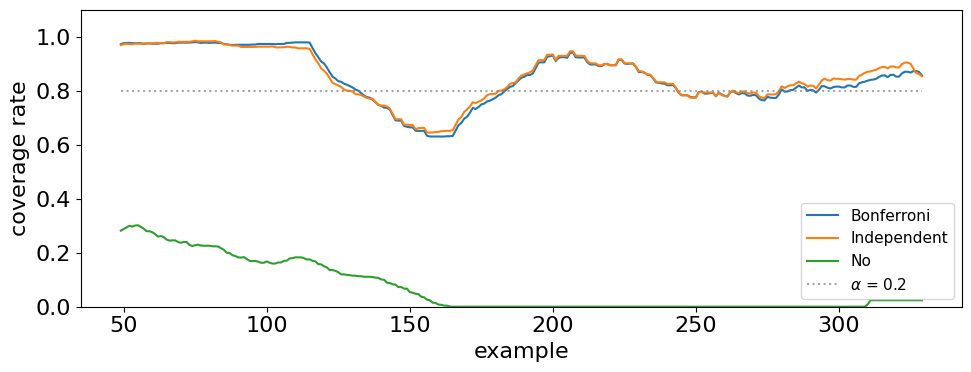

In [9]:
# RollingCoverageRate.comparative_plot(rcr_results, fig_names, 0.2, fig_size=(12, 6), title='Rolling Coverage Rate on the Tétouan City Data Set')
RollingCoverageRate.comparative_plot(rcr_results, fig_names, 0.2, fig_size=(10, 4))

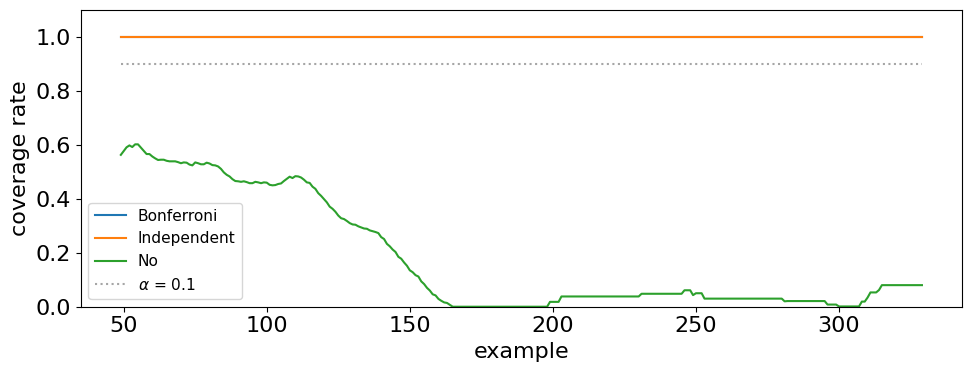

In [10]:
RollingCoverageRate.comparative_plot(rcr_results, fig_names, 0.1, fig_size=(10, 4))

### Feature-wise coverage rate

In [17]:
fcr_results = [CoverageRateByFeature.load(
    os.path.join(os.path.join(experiment_group_dir, exp_dir + '/summary'), CoverageRateByFeature.snake_name())) for
    exp_dir in experiment_dirs]

In [22]:
cr_by_feature = {f'feature_{i}': [] for i in range(3)}
for i in range(3):  # for every tested correction mehtod
    fcr_r_ex = fcr_results[i]
    for j in range(3):  # for every feature
        fcr_r_ex_f = (fcr_r_ex[0], fcr_r_ex[1][:, j])
        cr_by_feature[f'feature_{j}'].append(fcr_r_ex_f)

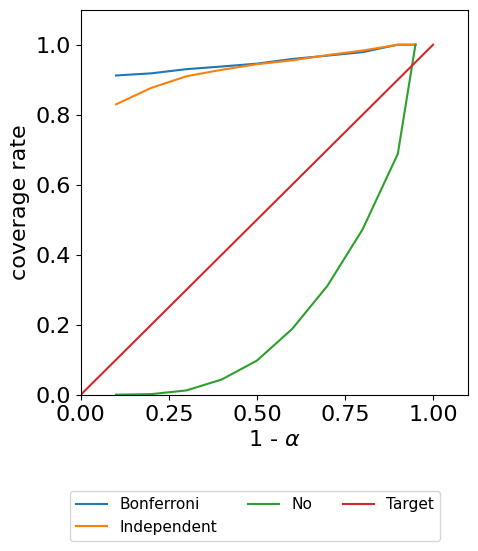

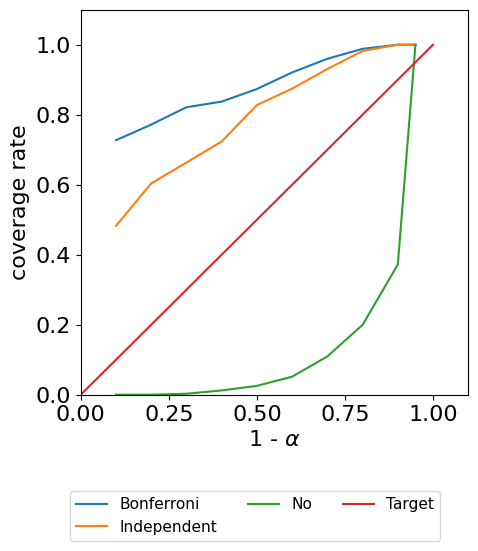

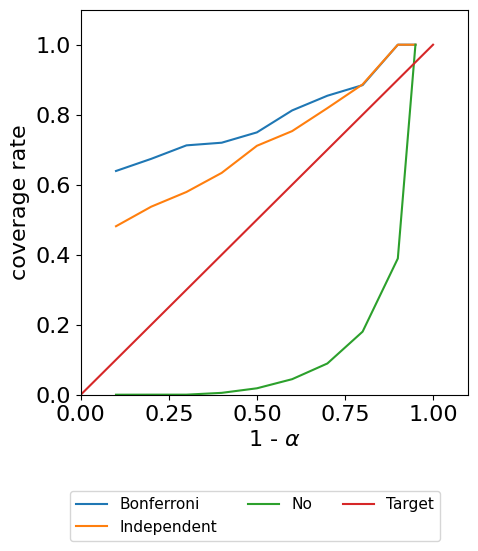

In [24]:
for i in range(3):
    CoverageRate.comparative_plot(cr_by_feature[f'feature_{i}'], fig_names + ['Target'],
                              # save_path=fig_out_dir / (CoverageRate.snake_name() + '.png'),
                              fig_size=(5, 5))

### Rolling Coverage Rate by Feature

In [26]:
frcr_results = [RollingCoverageRateByFeature.load(
    os.path.join(os.path.join(experiment_group_dir, exp_dir + '/summary'), RollingCoverageRateByFeature.snake_name())) for
    exp_dir in experiment_dirs]

In [29]:
rcr_by_feature = {f'feature_{i}': [] for i in range(3)}
for i in range(3):  # for every tested correction mehtod
    frcr_r_ex = frcr_results[i]
    for j in range(3):  # for every feature
        fcr_r_ex_f = (frcr_r_ex[0], frcr_r_ex[1][:, :, j], frcr_r_ex[2])
        rcr_by_feature[f'feature_{j}'].append(fcr_r_ex_f)

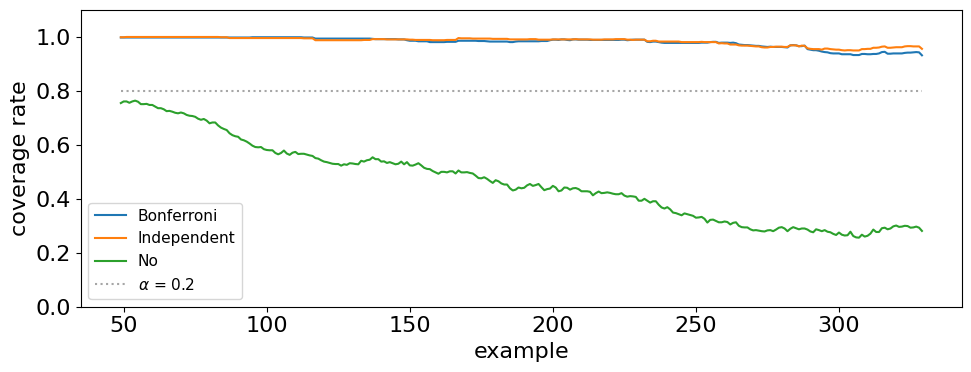

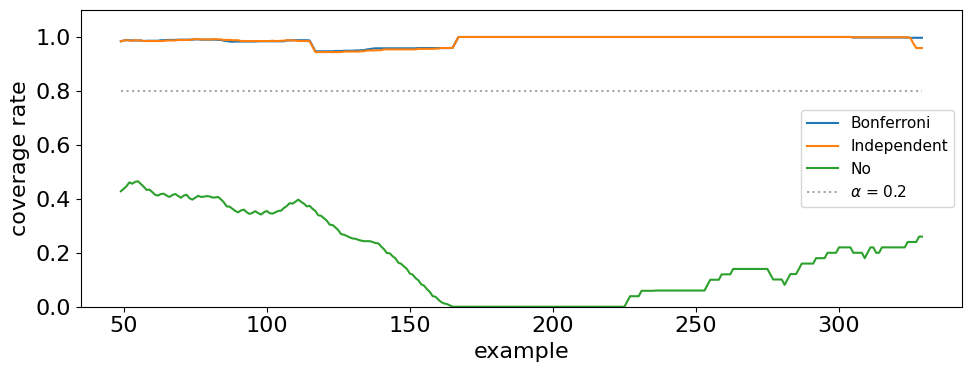

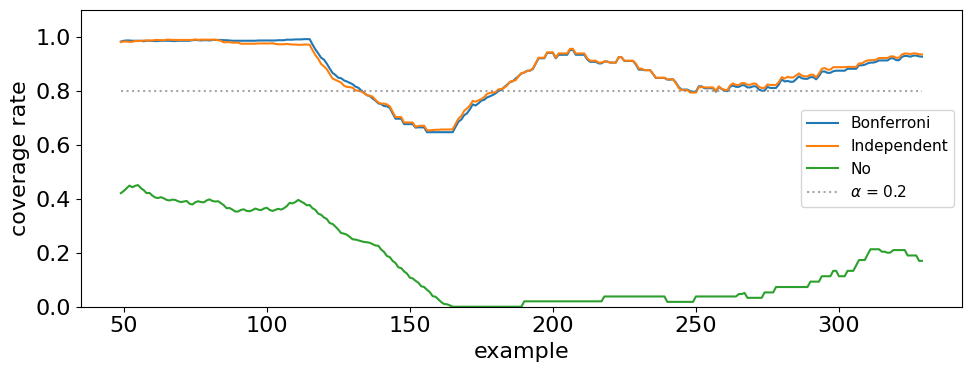

In [30]:
for i in range(3):
    RollingCoverageRate.comparative_plot(rcr_by_feature[f'feature_{i}'], fig_names, 0.2, fig_size=(10, 4))

## Interval width

In [11]:
miw_results = [MeanIntervalWidth.load(
    os.path.join(os.path.join(experiment_group_dir, exp_dir + '/summary'), MeanIntervalWidth.snake_name())) for exp_dir
    in
    experiment_dirs]

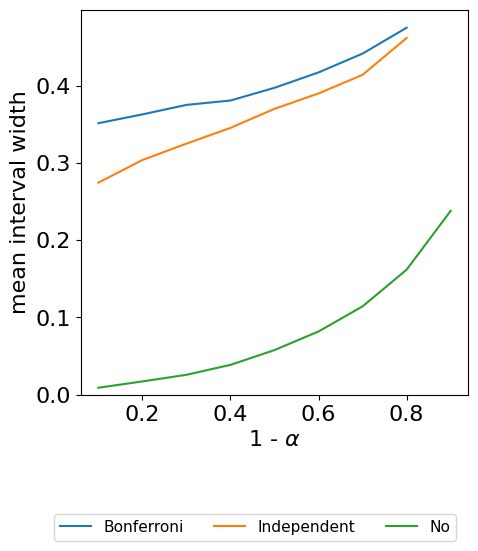

In [12]:
MeanIntervalWidth.comparative_plot(miw_results, fig_names,
                                   # save_path=fig_out_dir / f'comparison/{MeanIntervalWidth.snake_name()}.png',
                                   fig_size=(5, 5))

In [13]:
miw_df = pd.DataFrame([[*miw_results[i][1]] for i in range(len(miw_results))], columns=1 - miw_results[0][0],
                      index=fig_names).T
miw_df = miw_df.round(decimals=3)
# miw_df.to_csv(table_out_dir / f'miw_{now()}.csv')
miw_df

,Bonferroni,Independent,No
0.10,0.351,0.274,0.009
0.20,0.363,0.304,0.017
0.30,0.375,0.325,0.026
0.40,0.381,0.345,0.039
0.50,0.397,0.370,0.058
0.60,0.417,0.390,0.082
0.70,0.441,0.414,0.114
0.80,0.475,0.462,0.162
0.90,inf,inf,0.238
0.95,inf,inf,inf


## Examples


In [14]:
# todo: generate some example plots of the input to the model, the prediction, the true label and the generated intervals.